In [25]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import graphviz
from graphviz import Graph

import env
import acquire
import prepare
import os

# turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")

In [26]:
# change setting to show all columns
pd.set_option('display.max_columns', None)

# Telco Customer Churn

Lori Ainslie, 11/29/21

***

# Executive Summary

## Project Goals

- To identify drivers of customer churn and find a solution for increasing customer retention

- To construct a model that accurately predicts which customers are most likely to churn to focus retention efforts

## Project Description

- Reducing churn is important to the company because lost customers means lost revenue. The cost of acquiring a new customer is much higher than maintaining a customer so this project will attempt to identify strategies that reduce customer churn. In the process, we are also looking for ways to improve customer satisfaction to increase the company's rate of growth.

***

# Acquisition

In [27]:
# pull in telco data & check out what first few rows look like
df = acquire.get_telco_data()
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,90.45,5957.9,No,Two year,DSL,Mailed check
1,4,1,3,0017-DINOC,Male,0,No,No,54,No,No phone service,Yes,No,No,Yes,Yes,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic)
2,3,1,3,0019-GFNTW,Female,0,No,No,56,No,No phone service,Yes,Yes,Yes,Yes,No,No,No,45.05,2560.1,No,Two year,DSL,Bank transfer (automatic)
3,4,1,3,0056-EPFBG,Male,0,Yes,Yes,20,No,No phone service,Yes,No,Yes,Yes,No,No,Yes,39.40,825.4,No,Two year,DSL,Credit card (automatic)
4,3,1,3,0078-XZMHT,Male,0,Yes,No,72,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,85.15,6316.2,No,Two year,DSL,Bank transfer (automatic)


***

# Preparation

In [28]:
train, validate, test = prepare.prep_telco_data(df)
train.head()

,customer_id,senior_citizen,tenure,multiple_lines,monthly_charges,total_charges,contract_type,internet_service_type,payment_type,is_male,has_partner,has_dependents,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,churn,one_line,no_phone_service,has_multiple_lines,month_to_month_contract,one_year_contract,two_year_contract,dsl_internet,fiber_optic_internet,no_internet_service,bank_transfer_payment_automatic,credit_card_payment_automatic,electronic_check_payment,mailed_check_payment
1196,9968-FFVVH,0,63,Yes,68.80,4111.35,One year,DSL,Bank transfer (automatic),1,0,0,1,1,1,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0
4239,3956-CJUST,1,23,No,75.40,1643.55,Month-to-month,Fiber optic,Bank transfer (automatic),0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0
846,3941-XTSKM,0,42,No phone service,45.10,2049.05,One year,DSL,Credit card (automatic),1,1,1,0,1,1,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0
6014,7717-BICXI,0,60,No,20.55,1205.05,Two year,None,Mailed check,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
6667,2692-PFYTJ,0,1,Yes,25.75,25.75,Month-to-month,None,Mailed check,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1


**Steps taken to prepare the data:**

- Checked column names, data types, dataframe shape, null values, statistical information, and value counts

- Changed data type for total charges to float

- Dropped rows for customers with less than a month of service therefore no opportunity to churn

- Replaced all instances of 'No internet service' as that information is duplicated in another column

- Created dummy variables for columns with object data type

- Dropped columns that were duplicated by creating dummy variables or unnecessary 

- Used histograms to check out distribution of numerical columns

- Created functions to clean and split the data

***

# Exploration

<AxesSubplot:>

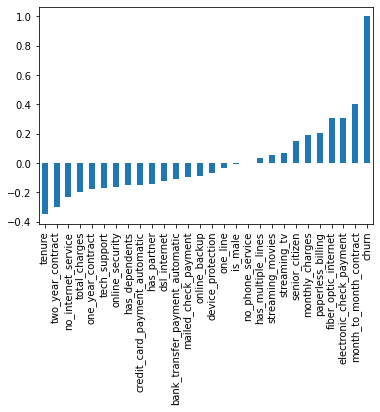

In [29]:
train.corr()['churn'].sort_values().plot(kind='bar')

## 1. Do customers with month-to-month contracts churn more than other contract types?

Text(0, 0.5, 'Number of Customers')

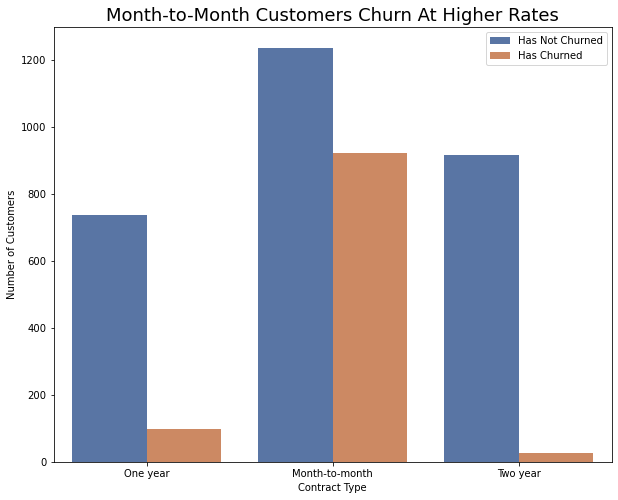

In [30]:
# plot visualization of number of customers churned/not churned by contract type
plt.figure(figsize=(10,8))
sns.countplot(x='contract_type', hue='churn', palette='deep', data=train)
plt.title('Month-to-Month Customers Churn At Higher Rates', fontsize=18)
plt.legend(labels=['Has Not Churned','Has Churned'])
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')

## Month-to-month customers churn at almost 5x the rate of those with contracts

***

## 2. Is there a tenure length where customers are more likely to churn?

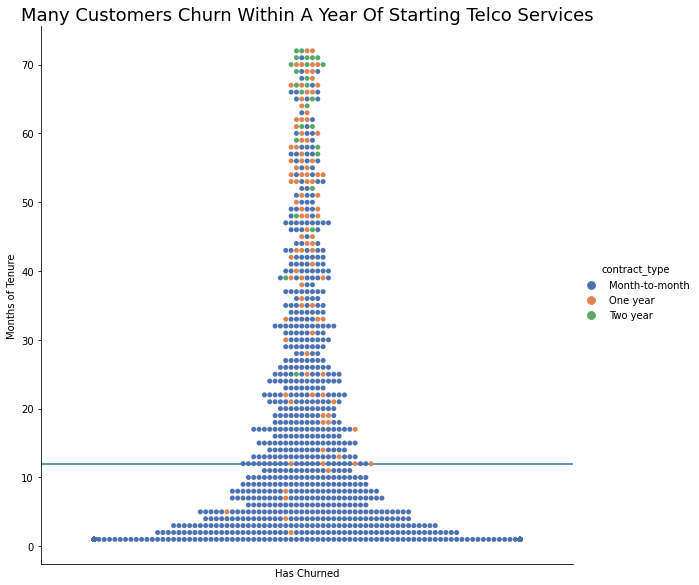

In [31]:
# plot visualization of relationship of amount of customers churned across different lengths of tenure
sns.catplot(x='churn', y='tenure', 
            kind='swarm', hue='contract_type', 
            palette='deep', size=8, aspect=1,
            data=train[train.churn==1])

plt.title('Many Customers Churn Within A Year Of Starting Telco Services', fontsize=18)
plt.xlabel('Has Churned')
plt.ylabel('Months of Tenure')
plt.xticks([1], ['Has Churned'])
plt.axhline(y=12)

## The largest portion of customers who churn do so within the first 6 months

***

## 3. Is a specific internet service type associated with higher churn rates?

Text(0, 0.5, 'Number of Customers')

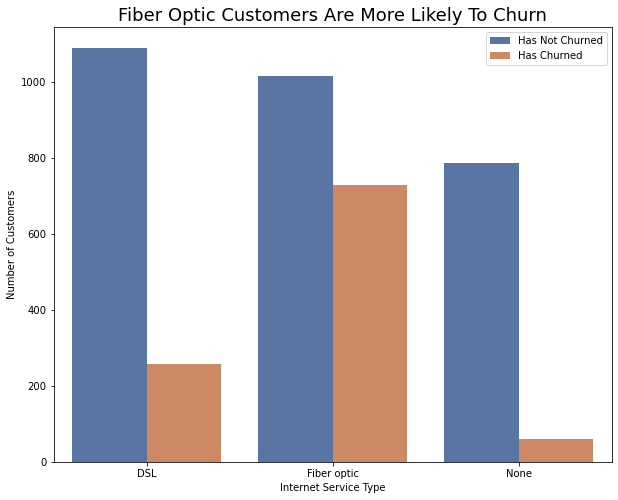

In [32]:
# plot visualization of number of customers churned/not churned by internet service type
plt.figure(figsize=(10,8))
sns.countplot(x='internet_service_type', hue='churn', palette='deep', data=train)
plt.title('Fiber Optic Customers Are More Likely To Churn', fontsize=18)
plt.legend(labels=['Has Not Churned','Has Churned'])
plt.xlabel('Internet Service Type')
plt.ylabel('Number of Customers')

**Hypothesis testing to see if this is statistically significant:**

**Null Hypothesis: Fiber optic customers are just as likely or less likely to churn than those with DSL or no internet.**

**Null Hypothesis: Fiber optic customers are more likely to churn than those with DSL or no internet.**

In [33]:
# conduct hypothesis testing to evaluate the relationship between churn and internet service type
alpha = 0.05

observed = pd.crosstab(train.churn, train.internet_service_type)
chi2, p, degf, expected = stats.chi2_contingency(observed)

print(p)
if p < alpha:
      print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

1.5412855944468989e-89
We reject the null hypothesis


## Both the chart and test show that fiber optic customers are more likely to churn.

***

## 4. Is it higher monthly charges that are causing churn?

([<matplotlib.axis.XTick at 0x7f8929a9efd0>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

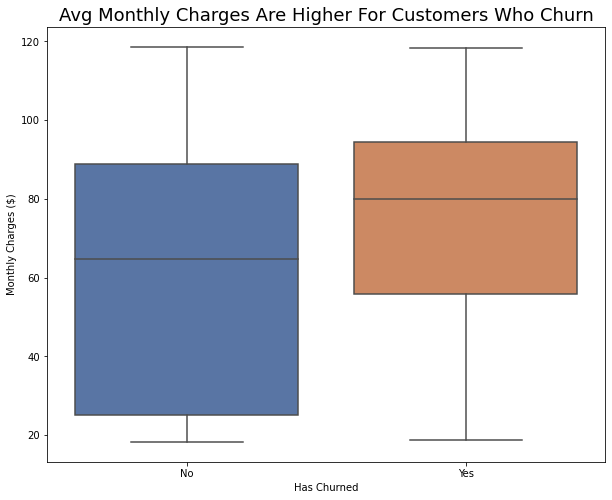

In [34]:
# plot visualization of distribution of monthly charges for those who have churned vs those who have not churned
plt.figure(figsize=(10,8))
sns.boxplot(x=train.churn, y=train.monthly_charges, data=train , palette='deep')
plt.title('Avg Monthly Charges Are Higher For Customers Who Churn', fontsize=18)
plt.xlabel('Has Churned')
plt.ylabel('Monthly Charges ($)')
plt.xticks([0, 1], ['No','Yes'])

**Hypothesis testing using one-sample, one-tail t-test to see if this is statistically significant:**

Because sample size is >500, the central limit theorum tells us that we can assume normal distribution

**Null Hypothesis: Monthly charges for customers who have churned are equal or less than those for customers who have not churned**

**Alternate Hypothesis: Monthly charges for customers who have churned are more than those for customers who have not churned**

In [35]:
# conduct hypothesis testing to evaluate the relationship between churn and monthly charges
alpha = 0.05
churn_subset = train[train.churn==1].monthly_charges
mean_charges = train.monthly_charges.mean()

t, p = stats.ttest_1samp(churn_subset, mean_charges)

if p/2 > alpha:
    print('We fail to reject the null hypothesis')
elif t < 0:
    print('We fail to reject the null hypothesis')
else:
    print('We reject the null hypothesis')

We reject the null hypothesis


## Both the chart and test show that churn is associated with higher monthly charges.

***

## Exploration Summary


**- Month-to-month contracts and having fiber optic internet service are both correlated with higher rates of churn**

**- Higher monthly charges are also seen with customers who have churned**

**- Key takeaway is that customers are unhappy with the higher prices associated with fiber optic service and/or the quality of fiber optic service**

**- Going forward these features will be key to identifying customers with an increased risk of churning in order to target them with incentivized offers for their loyalty**

**- Features that will be used in modeling because of their correlation with churn are:** 

*tenure, monthly_charges, paperless_billing, churn, month_to_month_contract, one_year_contract, two_year_contract, dsl_internet, fiber_optic_internet, no_internet_service*
       
**- Features that will not be used in modeling because of their limited correlation with churn or because already represented with dummy variables are:** 

*senior_citizen, multiple_lines, total_charges, contract_type, internet_service_type, payment_type, is_male, has_partner, has_dependents, online_security, online_backup, device_protection, tech_support, streaming_tv, streaming_movies, one_line, no_phone_service, has_multiple_lines, bank_transfer_payment_automatic, credit_card_payment_automatic, electronic_check_payment, mailed_check_payment*

***

# Modeling

In [36]:
# checking most common value for churn
train.churn.value_counts()

0    2891
1    1046
Name: churn, dtype: int64

In [37]:
# calculate baseline accuracy
baseline_accuracy = round((train.churn == 0).mean(), 2)
baseline_accuracy

0.73

**Baseline accuracy is 73% which is what a model must beat to provide value**

In [38]:
# drop features determined in the explore phase to not have much correlation with churn
cols_to_drop = ['customer_id','senior_citizen', 'multiple_lines', 'total_charges', 'contract_type', 'internet_service_type', 'payment_type', 'is_male', 'has_partner', 'has_dependents', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'one_line', 'no_phone_service', 'has_multiple_lines', 'bank_transfer_payment_automatic', 'credit_card_payment_automatic', 'electronic_check_payment', 'mailed_check_payment', 'churn']

# create X and y version of train, validate, and test
X_train = train.drop(columns=cols_to_drop)
y_train = train.churn

X_validate = validate.drop(columns=cols_to_drop)
y_validate = validate.churn

X_test = test.drop(columns=cols_to_drop)
y_test = test.churn

In [39]:
# check shape of each to confirm changes were made
X_train.shape, X_validate.shape, X_test.shape

((3937, 9), (1688, 9), (1407, 9))

In [40]:
# check first few rows of X_train
X_train.head()

,tenure,monthly_charges,paperless_billing,month_to_month_contract,one_year_contract,two_year_contract,dsl_internet,fiber_optic_internet,no_internet_service
1196,63,68.80,0,0,1,0,1,0,0
4239,23,75.40,1,1,0,0,0,1,0
846,42,45.10,1,0,1,0,1,0,0
6014,60,20.55,0,0,0,1,0,0,1
6667,1,25.75,1,1,0,0,0,0,1


In [41]:
# Evaluate Random Forest model on train & validate set

# define the model setting hyperparameters to values for current loop
forest = RandomForestClassifier(max_depth=8, min_samples_leaf=8, random_state=369)

# fit the model on train
forest = forest.fit(X_train, y_train)

# use the model and evaluate performance on train
train_accuracy = forest.score(X_train, y_train)
# use the model and evaluate performance on validate
validate_accuracy = forest.score(X_validate, y_validate)

print(f'train_accuracy: {train_accuracy}')
print(f'validate_accuracy: {validate_accuracy}')

train_accuracy: 0.8166116332232665
validate_accuracy: 0.7968009478672986


In [42]:
# Evaluate KNearest Neighbors model on train & validate set
            
# define the model setting hyperparameter to 6
knn = KNeighborsClassifier(n_neighbors=6)
    
# fit the model on train
knn.fit(X_train, y_train)
    
# use the model and evaluate performance on train
train_accuracy = knn.score(X_train, y_train)
# use the model and evaluate performance on validate
validate_accuracy = knn.score(X_validate, y_validate)
    
print(f'train_accuracy: {train_accuracy}')
print(f'validate_accuracy: {validate_accuracy}')

train_accuracy: 0.8186436372872746
validate_accuracy: 0.7902843601895735


In [43]:
# Evaluate Logistic Regression model on train & validate set
            
# define the model setting hyperparameters to 10
logit = LogisticRegression(C=10)
    
# fit the model on train
logit.fit(X_train, y_train)
    
# use the model and evaluate performance on train
train_accuracy = logit.score(X_train, y_train)
# use the model and evaluate performance on validate
validate_accuracy = logit.score(X_validate, y_validate)
    
print(f'train_accuracy: {train_accuracy}')
print(f'validate_accuracy: {validate_accuracy}')

train_accuracy: 0.7907035814071628
validate_accuracy: 0.7908767772511849


**- The random forest models proved to be the most accurate for this dataset although the k-nearest neighbors and logistic regression models were pretty close**

**- The random forest model selected for use on the test dataset is one with the max_depth and min_samples_leaf set to *. This was chosen for its high accuracy but with reduced likelihood of overfitting.**

In [44]:
# use the model and evaluate performance on test
print(f'Test accuracy = {forest.score(X_test, y_test)}')

Test accuracy = 0.8002842928216063


**Test accuracy for this model is 80%, 7% higher than the baseline**

***

# Conclusion


## Summary

Goals of this project were:

- To identify drivers of customer churn and find a solution for increasing customer retention

- To construct a model that accurately predicts which customers are most likely to churn to focus retention efforts

We identified some of the main drivers of churn as:

- Month-to-month contract

- Fiber optic internet service

- Higher monthly prices

We built a model that is expected to perform with about 80% accuracy on unseen data which will help with targeted efforts to improve customer retention.


## Recommendations

- Reduce monthly price for fiber optic internet service 

- Send out quarterly customer satisfaction surveys for better insights


## Next Steps

- With more time and resources, would like to collect and explore customer satisfaction data